In [40]:
import scri
import numpy as np
from spherical_functions import LM_index as lm

import quaternionic

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from cycler import cycler
import wesanderson as wes

%matplotlib inline

# better pictures and legends
plt.rc('figure', dpi=250)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', prop_cycle=cycler(color=wes.film_palette('Mr. Fox')))

In [41]:
# h = scri.SpEC.read_from_h5("../aux/data/BBH_SHK_q2_e095_D65/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N2.dir")
h = scri.SpEC.read_from_h5("../aux/data/SXS_BBH_0001/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N2.dir")

print(h.data)

[[ 4.35110689e-04-1.02152370e-03j -4.74434117e-11-4.62757493e-11j
  -2.81759814e-04-8.52883891e-14j ... -1.63744585e-09-5.20794761e-09j
  -1.64269946e-11-6.08956676e-12j  5.56348847e-09-2.23973035e-09j]
 [ 4.36959709e-04-1.01562374e-03j -5.74582748e-11-7.32078466e-11j
  -2.81701470e-04-7.71392193e-14j ... -5.69803980e-09-4.43587738e-09j
  -1.25355325e-11-1.21912076e-11j  6.30718621e-09-5.22775633e-09j]
 [ 4.38714027e-04-1.00972466e-03j -5.92874398e-11-1.01867763e-10j
  -2.81636597e-04-6.57034437e-14j ... -9.73881877e-09-3.03849891e-09j
  -7.53617199e-12-1.54345605e-11j  6.74719571e-09-7.61488992e-09j]
 ...
 [ 3.56009715e-04+2.07644218e-04j  3.05168629e-11+2.86534942e-10j
  -6.34810242e-05+2.84932509e-11j ... -5.53228491e-08+1.82724965e-07j
   6.71970901e-11+5.03004739e-11j  3.19352273e-08-1.43993117e-06j]
 [ 3.56013247e-04+2.07926907e-04j  3.08249706e-11+2.85742319e-10j
  -6.33964440e-05+2.79375337e-11j ... -5.48607611e-08+1.81455125e-07j
   6.71519778e-11+5.01385766e-11j  2.83734465e-

[-0.00024182-6.51621116e-04j -0.00024298-6.48291929e-04j
 -0.00024409-6.44966926e-04j ... -0.00023516+9.06298528e-05j
 -0.00023518+9.07940750e-05j -0.00023521+9.09624180e-05j]


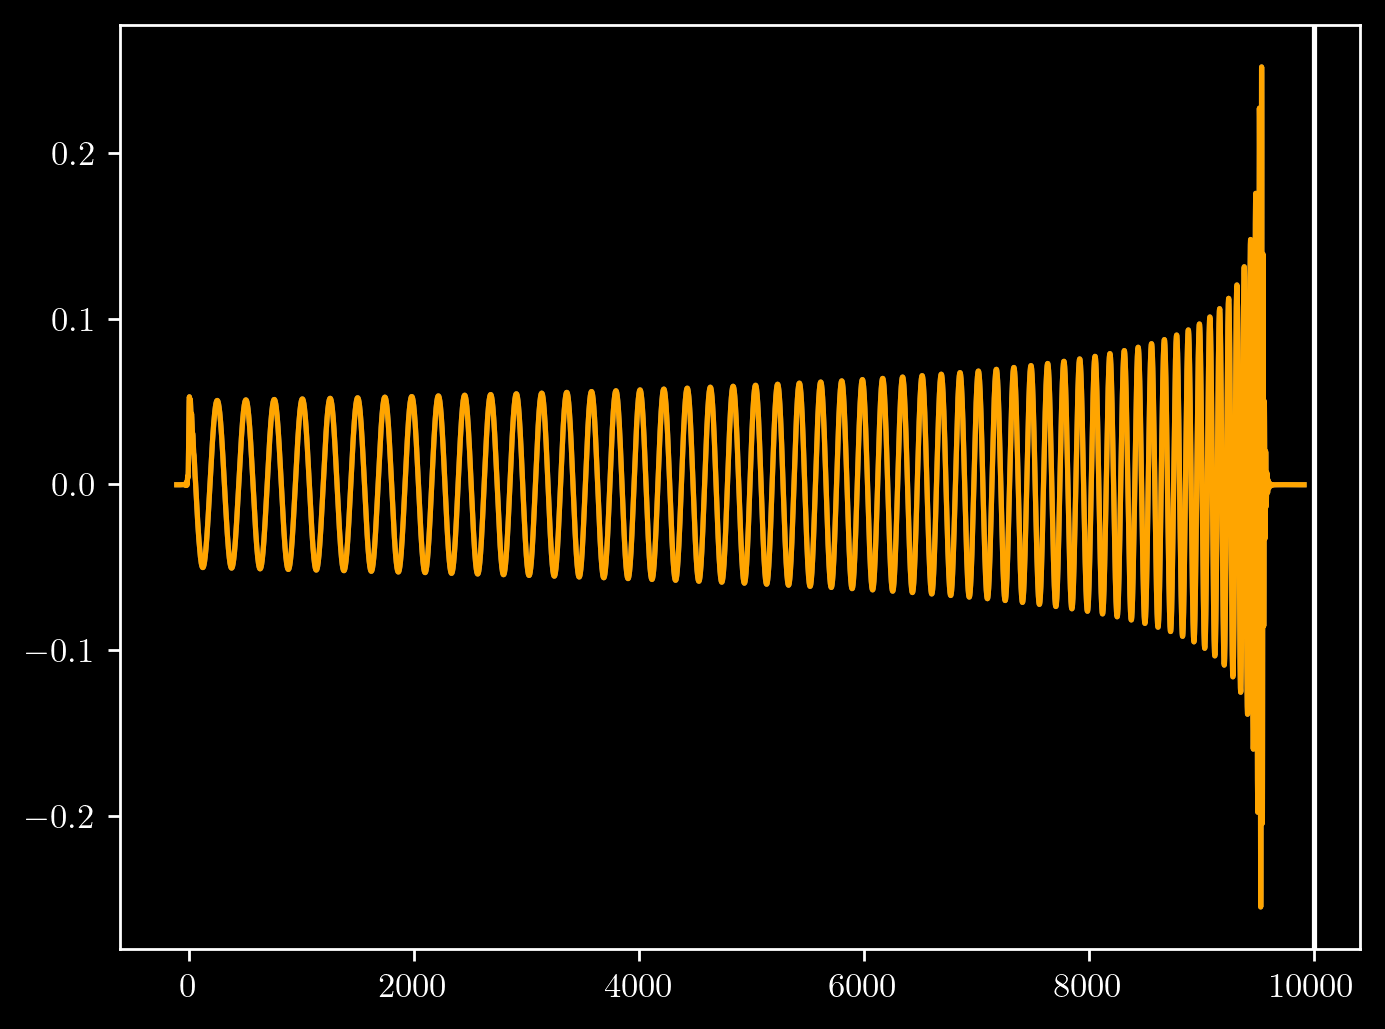

In [42]:
def evaluate_swsh(spin_weight, ell_max, coefficients, theta, phi):
    wigner = spherical.Wigner(ell_max=ell_max)
    direction = quaternionic.array.from_spherical_coordinates(theta, phi)
    total = np.zeros(coefficients.shape[0], dtype=complex)

    for l in range(abs(spin_weight), ell_max + 1):
        for abs_m in range(0, l + 1):
            for sign_m in (-1, 1):
                m = abs_m * sign_m
                mode_profile = wigner.sYlm(s=spin_weight, R=direction)[spherical.LM_index(l, m, 0)]
                total += coefficients[:,spherical.LM_index(l, m, 2)] * mode_profile
    return total

out = evaluate_swsh(spin_weight=-2, ell_max=8, coefficients=h.data, theta=0, phi=np.pi/2)
print(out)
h_real = np.real(out)

plt.style.use('dark_background')

# timesteps = np.linspace(0, 10000, 200)

timesteps = [10000]

for i, t in enumerate(timesteps):
    fig = plt.figure()
    plt.plot(h.t, h_real, color="gray")
    mask = h.t < t
    plt.plot(h.t[mask], h_real[mask], color="orange")
    plt.axvline(x=t, color="white")
    # fig.savefig(f"../aux/waveform-frames/frame.{i:06d}.png")
    plt.show()
    plt.close()